In [70]:
import pandas as pd; import matplotlib

In [71]:
p1 = pd.read_csv(r"C:\Users\akad\Dropbox\PC\Desktop\DATAFEST\player-6607011.csv")

C:\Users\akad\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (38,39,40,68,70,72,73,74,76,77,78,81,131) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [147]:
p1[['player_id', 'event_id', 'stack_id', 'missed_safe_invitations', 'accepted_unsafe_invitations', 'event_category', 'points_lost_gained']].fillna(method='ffill').dropna()

,player_id,event_id,stack_id,missed_safe_invitations,accepted_unsafe_invitations,event_category,points_lost_gained
462,6607011,911,0.0,0.0,0.0,People Sense,9.0
463,6607011,1005,0.0,0.0,0.0,Minigame General,9.0
464,6607011,1001,0.0,0.0,0.0,Minigame General,9.0
465,6607011,1003,0.0,0.0,0.0,Minigame General,9.0
466,6607011,210,0.0,0.0,0.0,Challenge Stack,9.0
...,...,...,...,...,...,...,...
10296,6607011,105,6.0,1.0,2.0,Lifeline,-2.0
10297,6607011,703,6.0,1.0,2.0,Epilogue,-2.0
10298,6607011,1,6.0,1.0,2.0,General,-2.0
10299,6607011,706,6.0,1.0,2.0,Epilogue,-2.0


In [99]:
p1.loc[:, ['stack_id']].fillna(method='ffill').dropna()


,stack_id
14,12.0
15,12.0
16,12.0
17,12.0
18,12.0
...,...
10296,6.0
10297,6.0
10298,6.0
10299,6.0


In [ ]:
exporting = p1[14:].to_csv('p6607_stack_id_cleaned_v2.csv', index=True)


In [173]:
q = p1[['player_id', 'event_id', 'stack_id', 'missed_safe_invitations', 'accepted_unsafe_invitations', 'event_category', 'points_lost_gained', 'minigame_level']].fillna(method='ffill').query('event_category == "People Sense"').dropna().query('event_id == 911')

In [179]:
q = q.assign(invitation_danger_level = lambda q: q.missed_safe_invitations + q.accepted_unsafe_invitations); q

,player_id,event_id,stack_id,missed_safe_invitations,accepted_unsafe_invitations,event_category,points_lost_gained,minigame_level,invitation_danger_level
462,6607011,911,0.0,0.0,0.0,People Sense,9.0,0.0,0.0
2794,6607011,911,1.0,1.0,1.0,People Sense,5.0,1.0,2.0
2946,6607011,911,1.0,0.0,0.0,People Sense,-7.0,1.0,0.0
5454,6607011,911,4.0,0.0,2.0,People Sense,9.0,2.0,2.0
5629,6607011,911,4.0,0.0,0.0,People Sense,-11.0,2.0,0.0
7920,6607011,911,4.0,1.0,1.0,People Sense,9.0,2.0,2.0
8048,6607011,911,4.0,0.0,2.0,People Sense,5.0,5.0,2.0
8165,6607011,911,4.0,0.0,0.0,People Sense,9.0,5.0,0.0
8336,6607011,911,4.0,1.0,0.0,People Sense,-2.0,7.0,1.0
8479,6607011,911,4.0,1.0,2.0,People Sense,0.0,8.0,3.0


<AxesSubplot:xlabel='minigame_level'>

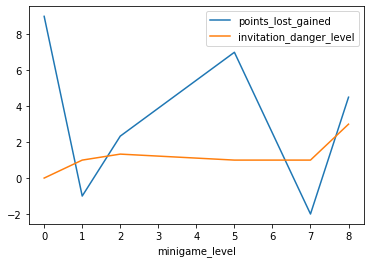

In [180]:
q.groupby('minigame_level').mean().reset_index().plot(x='minigame_level', y=['points_lost_gained', 'invitation_danger_level'])


In [248]:
pa = pd.read_csv(r"C:\Users\akad\Dropbox\PC\Desktop\DATAFEST\logs.csv"); pa.size()

C:\Users\akad\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (34,38,39,40,47,50,53,54,57,58,59,60,62,68,70,72,73,74,76,77,78,81,85,88,89,90,91,92,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,118,120,121,122,123,129,131) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


TypeError: 'numpy.int32' object is not callable

In [219]:
Q = pa[['player_id', 'event_id', 'stack_id', 'missed_safe_invitations', 'accepted_unsafe_invitations', 'event_category', 'points_lost_gained', 'minigame_level']].fillna(method='ffill').query('event_category == "People Sense"').query('stack_id != 12').dropna().query('event_id == 911').assign(invitation_danger_level = lambda Q: Q.missed_safe_invitations + Q.accepted_unsafe_invitations).groupby('stack_id').mean()

<AxesSubplot:>

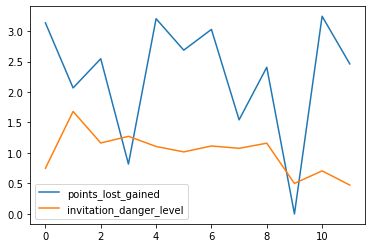

In [220]:
Q.reset_index().plot(y=['points_lost_gained', 'invitation_danger_level'])

In [244]:
pa[['player_id', 'event_id', 'stack_id', 'missed_safe_invitations', 'accepted_unsafe_invitations', 'event_category', 'points_lost_gained', 'minigame_level']].fillna(method='ffill').query('event_category == "People Sense"').query('stack_id != 12').dropna().query('event_id == 911').assign(invitation_danger_level = lambda Q: Q.missed_safe_invitations + Q.accepted_unsafe_invitations)

,player_id,event_id,stack_id,missed_safe_invitations,accepted_unsafe_invitations,event_category,points_lost_gained,minigame_level,invitation_danger_level
333,6427001,911,0.0,0.0,2.0,People Sense,9.0,0.0,2.0
430,6427001,911,0.0,0.0,0.0,People Sense,9.0,0.0,0.0
1092,6427001,911,0.0,0.0,0.0,People Sense,-7.0,0.0,0.0
1169,6427001,911,0.0,0.0,0.0,People Sense,-2.0,0.0,0.0
1243,6427001,911,0.0,0.0,1.0,People Sense,-2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
2104055,65670032,911,4.0,0.0,0.0,People Sense,9.0,2.0,0.0
2104211,65670032,911,4.0,0.0,0.0,People Sense,0.0,5.0,0.0
2104347,65670032,911,4.0,0.0,1.0,People Sense,0.0,7.0,1.0
2104475,65670032,911,4.0,0.0,0.0,People Sense,0.0,7.0,0.0


In [250]:
import dask.dataframe as dd

In [ ]:
pa = dd.read_csv(r"C:\Users\akad\Dropbox\PC\Desktop\DATAFEST\logs.csv")